# Deep Learning
## Practical Session 02

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Convolutional Neural Networks
In this notebook we will define a simple convolutional neural network to classify [MNIST digits](http://yann.lecun.com/exdb/mnist) and visualize the learned representation.

The network to be created will have 3 Convolutional layers (`Conv2D`). The first two `Conv2D` layers will be followed by a 2D Max Pooling (`MaxPooling2D`). After the last convolution, two fully connected layers (`Dense`) will be added.

In [ ]:
import keras
# Remove some unwanted warnings
import logging
logging.getLogger('tensorflow').disabled = True 
import numpy as np
import pandas as pd #
import tensorflow as tf

### MNIST Dataset
The MNIST dataset is an acronym that stands for the Modified National Institute of Standards and Technology dataset.

It is a dataset of 70,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

The task is to classify a given image of a handwritten digit into one of 10 classes representing integer values from 0 to 9, inclusively.

## Loading Dataset

In [ ]:
from keras.datasets import mnist
# The data, shuffled and split between train and test sets:
(trainX, trainy), (testX, testy) = mnist.load_data()
num_classes=len(np.unique(trainy))
print(f'num of classes = {num_classes}')

num of classes = 10


In [ ]:
print(trainX.shape)
print(trainy.shape)
print(str(trainX.shape[0]) + ' train samples')
print(str(testX.shape[0]) + ' test samples')

(60000, 28, 28)
(60000,)
60000 train samples
10000 test samples


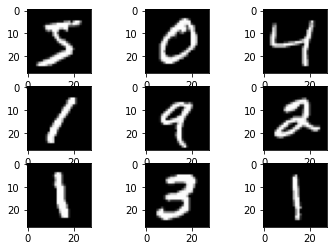

In [ ]:
from matplotlib import pyplot as plt
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

## 1.1. Dataset Preprocessing
There are 10 classes and that classes are represented as unique integers. We can, therefore, use a one hot encoding for the class element of each sample, transforming the integer into a 10 element binary vector with a 1 for the index of the class value. We can achieve this with the `to_categorical()` utility function.

In [ ]:
from tensorflow.keras.utils import to_categorical
# Convert a class vector (integers) to binary class matrix.
# Get only first 6000 samples from training and first 1000 samples from test set.
y_train = to_categorical(trainy[:6000]) 
y_test = to_categorical(testy[:1000])

We know that the pixel values for each image in the dataset are unsigned integers in the range between no color and full color, or 0 and 255.
So, we need to normalize the pixel values, e.g. rescale them to the range [0,1]. This involves first converting the data type from unsigned integers to floats, then dividing the pixel values by the maximum value.

In [ ]:
# convert from integers to floats
X_train = trainX.astype('float32')
X_test = testX.astype('float32')

# reshape images to (28, 28, 1) and get only first 6000 training sample
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))[:6000]
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))[:1000]

# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
# the size of single image
print(X_train.shape[1:])
print(y_train)

(28, 28, 1)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


## 1.2. Building our network (Exercise 1)

As in the first practical, we will be using a Keras sequential model.
 
To start building our neural network, we add the convolutional and max pooling layers.
It is important to note that a ConvNet takes as input tensors of shape `(image_height, image_width, image_channels)` (not including the batch dimension). 
In our case, we will configure our ConvNet to process inputs of size `(28, 28)`, which is the format of MNIST images. We do this by passing the argument `input_shape=(28, 28)` to our first convolutional layer.

The first `Conv2D` layer should have 32 filters of size 3 by 3, and specify its input shape. The second and the third `Conv2D` layers should have 32 filters of size 3 by 3.
Remember that the first two `Conv2D` layers should be followed by 2 by 2 `MaxPooling2D` layers. All `Conv2D` should have `relu` activation.

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

# Create a sequential model
model = Sequential()

# Add convolutional and pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

Let's display the architecture of our convnet so far:

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
Total params: 18,816
Trainable params: 18,816
Non-trai

In [ ]:
# Add a Flatten layer to the model
model.add(layers.Flatten())
# Add a Dense layer with 64 units and relu activation
model.add(layers.Dense(64, activation='relu'))
# Add the last Dense layer.
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 32)          9248      
                                                                 
 flatten_1 (Flatten)         (None, 288)              

In [ ]:

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))
test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/5
94/94 [==============================] - 6s 58ms/step - loss: 0.8429 - accuracy: 0.7278 - val_loss: 0.4071 - val_accuracy: 0.8710
Epoch 2/5
94/94 [==============================] - 6s 60ms/step - loss: 0.2792 - accuracy: 0.9142 - val_loss: 0.4022 - val_accuracy: 0.8810
Epoch 3/5
94/94 [==============================] - 5s 54ms/step - loss: 0.1739 - accuracy: 0.9460 - val_loss: 0.1793 - val_accuracy: 0.9410
Epoch 4/5
94/94 [==============================] - 5s 51ms/step - loss: 0.1235 - accuracy: 0.9620 - val_loss: 0.1158 - val_accuracy: 0.9610
Epoch 5/5
32/32 [==============================] - 0s 9ms/step - loss: 0.0955 - accuracy: 0.9700


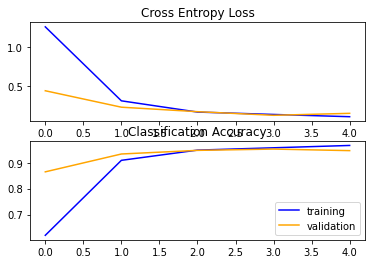

In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	plt.subplot(211)
	plt.title('Cross Entropy Loss')
	plt.plot(history.history['loss'], color='blue', label='train')
	plt.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	plt.subplot(212)
	plt.title('Classification Accuracy')
	plt.plot(history.history['accuracy'], color='blue', label='train')
	plt.plot(history.history['val_accuracy'], color='orange', label='test')
	plt.legend(['training', 'validation'])
	plt.show()
 
summarize_diagnostics(history)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print(cm)
acc = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print('test_accuracy: %.3f' % (acc))


[[ 84   0   0   0   0   0   1   0   0   0]
 [  1 125   0   0   0   0   0   0   0   0]
 [  1   1 112   0   0   0   1   1   0   0]
 [  1   0   1 103   0   2   0   0   0   0]
 [  0   1   0   0 107   0   1   0   0   1]
 [  0   0   0   2   0  84   0   0   1   0]
 [  0   0   0   0   0   0  87   0   0   0]
 [  2   1   1   0   1   0   0  94   0   0]
 [  2   0   1   1   1   0   0   1  81   2]
 [  1   0   0   0   1   0   0   2   0  90]]
test_accuracy: 0.967


Actual Label = 8
Prediction Label = 8


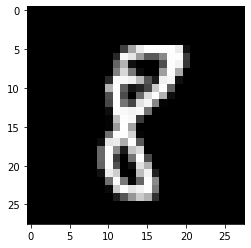

In [ ]:
import matplotlib.pyplot as plt
## Let's look at one of the images prediction
index = 1120
actual = testy[index]
plt.imshow(testX[index], cmap=plt.get_cmap('gray'))
pred = model.predict(testX)[index].argmax()
print(f'Actual Label = {actual}')
print(f'Prediction Label = {pred}')

## Exercise 5 - Transfer Learning

Transfer learning is a machine learning method where a model developed for a task is reused as the starting point for a model on a second task.
It is a popular approach in deep learning where pre-trained models are used as the starting point on computer vision and natural language processing tasks given the vast compute and time resources required to develop neural network models on these problems and from the huge jumps in skill that they provide on related problems.

It is common to perform transfer learning with predictive modeling problems that use image data as input. This may be a prediction task that takes photographs or video data as input.

For these types of problems, it is common to use a deep learning model pre-trained for a large and challenging image classification task such as the ImageNet 1000-class photograph classification competition.

### CIFAR10 Dataset

We will use transfer learning to classify images from [CIFAR10](https://www.cs.toronto.edu/~kriz/cifar.html) dataset. The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. Let's load the dataset and apply some preprocessing steps to make it ready as inputs of transfer learning:

In [ ]:
from keras.datasets import cifar10
# The data, shuffled and split between train and test sets:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
from tensorflow.keras.utils import to_categorical
# Dataset Preprocessing
y_train = to_categorical(y_train) # Converts a class vector (integers) to binary class matrix.
y_test = to_categorical(y_test)
# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0

Let's fit our model, constructed in previous section, on CIFAR10 dataset. And see the classification accuracy for test set. We won't apply any transfer learning in this step, just fit our previous model on CIFAR10 dataset.

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers

# Create a sequential model
model = Sequential()
# Add convolutional and pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape = X_train.shape[1:]))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
# Add a Flatten layer to the model
model.add(layers.Flatten())
# Add a Dense layer with 64 units and relu activation
model.add(layers.Dense(64, activation='relu'))
# Add the last Dense layer.
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

# Create a sequential model
model = Sequential()


Epoch 1/50
782/782 [==============================] - 8s 7ms/step - loss: 1.7027 - accuracy: 0.3811 - val_loss: 1.4446 - val_accuracy: 0.4708
Epoch 2/50
782/782 [==============================] - 4s 5ms/step - loss: 1.3753 - accuracy: 0.5058 - val_loss: 1.3976 - val_accuracy: 0.5006
Epoch 3/50
782/782 [==============================] - 4s 5ms/step - loss: 1.2282 - accuracy: 0.5643 - val_loss: 1.1585 - val_accuracy: 0.5881
Epoch 4/50
782/782 [==============================] - 4s 5ms/step - loss: 1.1191 - accuracy: 0.6049 - val_loss: 1.2162 - val_accuracy: 0.5656
Epoch 5/50
782/782 [==============================] - 4s 5ms/step - loss: 1.0398 - accuracy: 0.6349 - val_loss: 1.0670 - val_accuracy: 0.6193
Epoch 6/50
782/782 [==============================] - 4s 5ms/step - loss: 0.9778 - accuracy: 0.6581 - val_loss: 1.1395 - val_accuracy: 0.6057
Epoch 7/50
782/782 [==============================] - 4s 6ms/step - loss: 0.9325 - accuracy: 0.6726 - val_loss: 1.0623 - val_accuracy: 0.6375
Epoch 

In [ ]:
# example of loading the vgg16 model
from keras.applications.vgg16 import VGG16
# load model
vgg_model = VGG16()
# summarize the model
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras.applications.vgg16 import VGG16
# load model without output layer and specify a new input shape for images

vgg_model = VGG16(include_top=False, input_shape=(32, 32, 3))

In [ ]:
# mark loaded layers as not trainable
for layer in vgg_model.layers:
	layer.trainable = False

In [ ]:
from tensorflow.keras import layers
from keras.models import Model

# add new classifier layers
#add flatten layer
flat1 = layers.Flatten()(vgg_model.layers[-1].output)
#add Dense layer
class1 = layers.Dense(128, activation='relu')(flat1)
#add output layer with softmax activation
output = layers.Dense(10, activation='softmax')(class1)
# define new model
vgg_model = Model(inputs=vgg_model.inputs, outputs=output)
# summarize
vgg_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:

# compile model
vgg_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit model
history = vgg_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, verbose=1)

Epoch 1/25
1563/1563 [==============================] - 48s 30ms/step - loss: 0.2170 - accuracy: 0.9454 - val_loss: 0.9077 - val_accuracy: 0.7997
Epoch 2/25
1563/1563 [==============================] - 47s 30ms/step - loss: 0.1329 - accuracy: 0.9660 - val_loss: 1.2553 - val_accuracy: 0.8134
Epoch 3/25
1563/1563 [==============================] - 47s 30ms/step - loss: 0.2725 - accuracy: 0.9290 - val_loss: 2.0348 - val_accuracy: 0.7891
Epoch 4/25
1563/1563 [==============================] - 47s 30ms/step - loss: 0.1346 - accuracy: 0.9642 - val_loss: 1.0975 - val_accuracy: 0.7967
Epoch 5/25
1563/1563 [==============================] - 47s 30ms/step - loss: 0.2538 - accuracy: 0.9349 - val_loss: 1.0241 - val_accuracy: 0.7887
Epoch 6/25
1563/1563 [==============================] - 49s 31ms/step - loss: 0.1643 - accuracy: 0.9587 - val_loss: 1.1758 - val_accuracy: 0.8008
Epoch 7/25
1563/1563 [==============================] - 47s 30ms/step - loss: 0.1468 - accuracy: 0.9667 - val_loss: 1.1862 -

In [ ]:
test_loss, test_acc = vgg_model.evaluate(X_test, y_test)
print(test_acc)

313/313 [==============================] - 3s 10ms/step - loss: 1.0517 - accuracy: 0.7319
0.7318999767303467
